In [1]:
%load_ext autoreload
%autoreload 2
import sklearn
from sklearn.datasets import load_wine, load_iris
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

from einops import rearrange
import numpy as np
import matplotlib.pyplot as plt

from convexlocalisometry.transformation import exponential_transformation
from convexlocalisometry.loss import isometry_loss
from convexlocalisometry.algorithm import greedy, brute, group_basis_pursuit, group_lasso
import random

np.random.seed(1234)
random.seed(1234)


In [2]:
wine = load_wine()
print(wine.keys())
P_wine, D_wine = wine['data'].shape
print("D_wine", D_wine)
print("P_wine", P_wine)
print(wine['feature_names'])
wine_df = pd.DataFrame(data= wine['data'], columns = wine['feature_names']) # label with class names?
scaler = StandardScaler()
wine_standardized = pd.DataFrame(data = scaler.fit_transform(wine['data']), columns = wine['feature_names'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
D_wine 13
P_wine 178
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
iris = load_iris()
print(iris.keys())
P_iris, D_iris = iris['data'].shape

print("D_iris", D_iris)
print("P_iris", P_iris)
print(wine['feature_names'])
iris_df = pd.DataFrame(data= iris['data'], columns = iris['feature_names'])

scaler = StandardScaler()
iris_standardized = pd.DataFrame(data = scaler.fit_transform(iris['data']), columns = iris['feature_names'])


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
D_iris 4
P_iris 150
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [4]:
from tqdm import tqdm
# X.shape
# ??isometry_loss

In [5]:
losses = []
nbp = []
two_stage_losses = []
random_two_stage_losses= []
for i in range(25):
    X = iris_standardized.sample(frac = .5).to_numpy().transpose()
    output = greedy(X, isometry_loss, D_iris, []) # plainly brute is too hard 178**13 combinations
    loss = isometry_loss(X[:,output])
    losses.append(loss)
    data_transformed = exponential_transformation(X)
    beta = group_basis_pursuit(data_transformed)
    basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
    nbp.append(len(basis_pursuit_indices))
#     two_stage_output = basis_pursuit_indices[np.asarray(greedy(X[:,basis_pursuit_indices], isometry_loss, D_wine, []))] # plainly this is too hard 178**13 combinations
    two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, D_iris))] # plainly this is too hard 178**13 combinations
    two_stage_loss = isometry_loss(X[:,two_stage_output])
    two_stage_losses.append(two_stage_loss)
    random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
    random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

/Users/samsonkoelle/miniconda3/envs/isometry/lib/python3.10/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 12336.19it/s]
/Users/samsonkoelle/convexlocalisometry/convexlocalisometry/loss.py:14: RuntimeWarning: overflow encountered in exp
  (np.exp(singular_values) + np.exp(singular_values ** (-1))) / (2 * np.e)


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 23721.52it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 16790.65it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 25790.70it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 15099.84it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 21591.50it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 22544.83it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 15987.87it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 12344.49it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 26790.88it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 4


126it [00:00, 23854.94it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 21114.80it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 12852.82it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 12375.01it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 18006.46it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 21126.45it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 17657.04it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 19620.51it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 18491.07it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 19052.65it/s]


Computing brute force solution for dictionary dimension 7 and target_dimension 4


35it [00:00, 19707.43it/s]


Computing brute force solution for dictionary dimension 5 and target_dimension 4


5it [00:00, 11366.68it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 20568.96it/s]


Computing brute force solution for dictionary dimension 6 and target_dimension 4


15it [00:00, 12615.71it/s]


Computing brute force solution for dictionary dimension 8 and target_dimension 4


70it [00:00, 24466.77it/s]


In [6]:
len(np.where(np.asarray(losses ) > np.asarray(two_stage_losses))[0])

23

In [7]:
print(np.mean(losses))
print(np.std(losses))  # Standard deviation
print(np.mean(two_stage_losses))
print(np.std(two_stage_losses))  # Standard deviation
print(np.mean(nbp))
print(np.std(nbp))  # Standard deviation

13.418240043748304
6.421590347988552
7.980094602761592
1.8257606867668987
7.0
0.938083151964686


In [8]:
print(np.mean(nbp))
print(np.std(nbp))  # Standard deviation

7.0
0.938083151964686


In [9]:
from scipy import stats

t_statistic, p_value = stats.ttest_rel(losses, two_stage_losses)


In [10]:
print(p_value)

0.00019227762964308477


In [18]:
# losses = []
# two_stage_losses = []
# random_two_stage_losses= []
# for i in range(1):
#     X = wine_standardized.sample(frac = .5).to_numpy().transpose()
#     output = greedy(X, isometry_loss, D_iris, []) # plainly brute is too hard 178**13 combinations
#     loss = isometry_loss(X[:,output])
#     losses.append(loss)
#     data_transformed = exponential_transformation(X)
#     beta = group_basis_pursuit(data_transformed)
#     basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
#     two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, D_iris))] # plainly this is too hard 178**13 combinations
#     two_stage_loss = isometry_loss(X[:,two_stage_output])
#     two_stage_losses.append(two_stage_loss)
#     random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
#     random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

In [11]:
losses = []
two_stage_losses = []
nbp = []
random_two_stage_losses= []
dimension = 5
for i in range(25):
    X = wine_standardized.sample(frac = .5).to_numpy().transpose()[:dimension,:]
    output = greedy(X, isometry_loss, dimension, []) # plainly brute is too hard 178**13 combinations
#     output = brute(X, isometry_loss, dimension)
    loss = isometry_loss(X[:,output])
    losses.append(loss)
    data_transformed = exponential_transformation(X)
    beta = group_basis_pursuit(data_transformed)
    basis_pursuit_indices = np.where(np.linalg.norm(beta, axis = 1))[0]
    nbp.append(len(basis_pursuit_indices))

    two_stage_output = basis_pursuit_indices[np.asarray(brute(X[:,basis_pursuit_indices], isometry_loss, dimension))] # plainly this is too hard 178**13 combinations
    two_stage_loss = isometry_loss(X[:,two_stage_output])
    two_stage_losses.append(two_stage_loss)
    random_indices = np.random.choice(range(X.shape[1]), len(basis_pursuit_indices), replace=False)
    random_two_stage_losses.append(isometry_loss(X[:,random_indices]))

Computing brute force solution for dictionary dimension 14 and target_dimension 5


2002it [00:00, 26528.87it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 23007.16it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 19553.14it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 24077.74it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 23134.50it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 28459.59it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 26335.64it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 22148.88it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 28444.58it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 23639.11it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 27859.78it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 24887.72it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 26830.44it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 26994.06it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 28487.96it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 26794.61it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 23130.08it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 20410.24it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 23875.41it/s]


Computing brute force solution for dictionary dimension 11 and target_dimension 5


462it [00:00, 26091.57it/s]


Computing brute force solution for dictionary dimension 12 and target_dimension 5


792it [00:00, 23048.50it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 23836.43it/s]


Computing brute force solution for dictionary dimension 10 and target_dimension 5


252it [00:00, 25861.62it/s]


Computing brute force solution for dictionary dimension 13 and target_dimension 5


1287it [00:00, 25351.74it/s]


Computing brute force solution for dictionary dimension 9 and target_dimension 5


126it [00:00, 19114.67it/s]


In [12]:
print(np.mean(losses))
print(np.std(losses))  # Standard deviation
print(np.mean(two_stage_losses))
print(np.std(two_stage_losses))  # Standard deviation
print(np.mean(nbp))
print(np.std(nbp))  # Standard deviation

5.748351077582056
0.20906514073788146
5.572803145225201
0.1075232804940342
11.68
1.2874781551544865


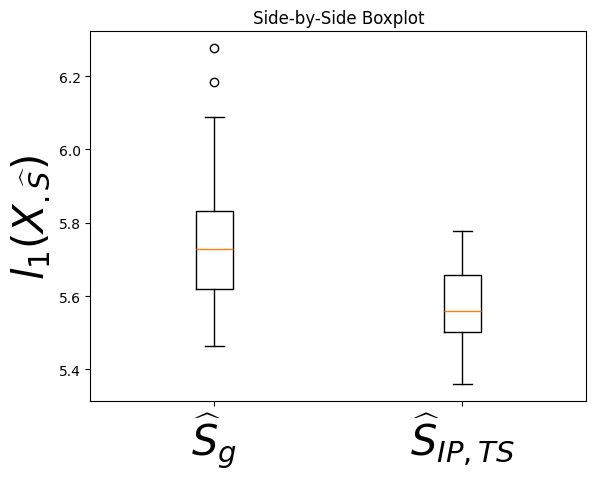

In [13]:
import matplotlib.pyplot as plt

data = [losses, two_stage_losses]
plt.boxplot(data)
plt.xticks([1, 2], [r'$\widehat S_{g}$', r'$\widehat S_{IP,TS}$'], fontsize=30)
plt.title('Side-by-Side Boxplot')
plt.ylabel('Values')
plt.ylabel(r'$l_1(X_{.\widehat {S}})$', fontsize = 30)
plt.savefig('/Users/samsonkoelle/convexlocalisometry/figures/Figure2b')

In [14]:
from scipy import stats

t_statistic, p_value = stats.ttest_rel(losses, two_stage_losses)


In [15]:
p_value

4.957758840665814e-05

In [30]:
iris_standardized.shape

(150, 4)